In [ ]:
# Usually pre-installed in Colab, but safe to re-run
!pip install pandas matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()  # choose your CSV file


Saving crypto_prices_all.csv to crypto_prices_all.csv


In [ ]:
df = pd.read_csv('crypto_prices_all.csv')
df.head()


,Date,Close,High,Low,Open,Volume,Coin,Close.1,High.1,Low.1,Open.1,Volume.1,Close.2,High.2,Low.2,Open.2,Volume.2
0,NaN,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,NaN,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD
1,2024-01-01,44167.33203125,44175.4375,42214.9765625,42280.234375,18426978443.0,BTC-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-02,44957.96875,45899.70703125,44176.94921875,44187.140625,39335274536.0,BTC-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-03,42848.17578125,45503.2421875,40813.53515625,44961.6015625,46342323118.0,BTC-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-04,44179.921875,44770.0234375,42675.17578125,42855.81640625,30448091210.0,BTC-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1098 non-null   object
 1   Close     367 non-null    object
 2   High      367 non-null    object
 3   Low       367 non-null    object
 4   Open      367 non-null    object
 5   Volume    367 non-null    object
 6   Coin      1098 non-null   object
 7   Close.1   367 non-null    object
 8   High.1    367 non-null    object
 9   Low.1     367 non-null    object
 10  Open.1    367 non-null    object
 11  Volume.1  367 non-null    object
 12  Close.2   367 non-null    object
 13  High.2    367 non-null    object
 14  Low.2     367 non-null    object
 15  Open.2    367 non-null    object
 16  Volume.2  367 non-null    object
dtypes: object(17)
memory usage: 146.1+ KB


In [ ]:
df.shape

(1099, 17)

In [ ]:
df.describe()

,Date,Close,High,Low,Open,Volume,Coin,Close.1,High.1,Low.1,Open.1,Volume.1,Close.2,High.2,Low.2,Open.2,Volume.2
count,1098,367,367,367,367,367,1098,367,367,367,367,367,367,367,367,367,367
unique,366,367,367,367,367,367,3,367,367,367,367,367,367,367,367,367,367
top,2024-12-31,93429.203125,96090.6015625,91914.03125,92643.25,43625106843.0,BTC-USD,3332.53173828125,3444.396728515625,3311.41259765625,3356.394775390625,20845452085.0,0.31568101048469543,0.32786598801612854,0.3094030022621155,0.3135179877281189,2204579838.0
freq,3,1,1,1,1,1,366,1,1,1,1,1,1,1,1,1,1


In [ ]:
df.isnull().sum()

,0
Date,1
Close,732
High,732
Low,732
Open,732
Volume,732
Coin,1
Close.1,732
High.1,732
Low.1,732


# Drop the first row (it contains repeated headers like 'BTC-USD')

In [ ]:
df = df.drop(0)

In [ ]:
df.head()

,Date,Close,High,Low,Open,Volume,Coin,Close.1,High.1,Low.1,Open.1,Volume.1,Close.2,High.2,Low.2,Open.2,Volume.2
1,2024-01-01,44167.33203125,44175.4375,42214.9765625,42280.234375,18426978443.0,BTC-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-02,44957.96875,45899.70703125,44176.94921875,44187.140625,39335274536.0,BTC-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-03,42848.17578125,45503.2421875,40813.53515625,44961.6015625,46342323118.0,BTC-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-04,44179.921875,44770.0234375,42675.17578125,42855.81640625,30448091210.0,BTC-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-01-05,44162.69140625,44353.28515625,42784.71875,44192.98046875,32336029347.0,BTC-USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Convert 'Date' to datetime and sort

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Select only BTC data for now (you can repeat for ETH and DOGE later)

In [ ]:
btc_df = df[['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Coin']].copy()

# Convert numeric columns to floats


In [ ]:
for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
    btc_df[col] = pd.to_numeric(btc_df[col], errors='coerce')

# Drop rows with missing values

In [ ]:
btc_df = btc_df.dropna()

# ✅ Basic info after cleaning

In [ ]:
print(btc_df.info())
print(btc_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1 to 366
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    366 non-null    datetime64[ns]
 1   Close   366 non-null    float64       
 2   High    366 non-null    float64       
 3   Low     366 non-null    float64       
 4   Open    366 non-null    float64       
 5   Volume  366 non-null    float64       
 6   Coin    366 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 22.9+ KB
None
        Date         Close          High           Low          Open  \
1 2024-01-01  44167.332031  44175.437500  42214.976562  42280.234375   
2 2024-01-02  44957.968750  45899.707031  44176.949219  44187.140625   
3 2024-01-03  42848.175781  45503.242188  40813.535156  44961.601562   
4 2024-01-04  44179.921875  44770.023438  42675.175781  42855.816406   
5 2024-01-05  44162.691406  44353.285156  42784.718750  44192.980469

# Save cleaned data

In [ ]:
btc_df.to_csv("cleaned_btc_data.csv", index=False)

1️⃣ Price Trend

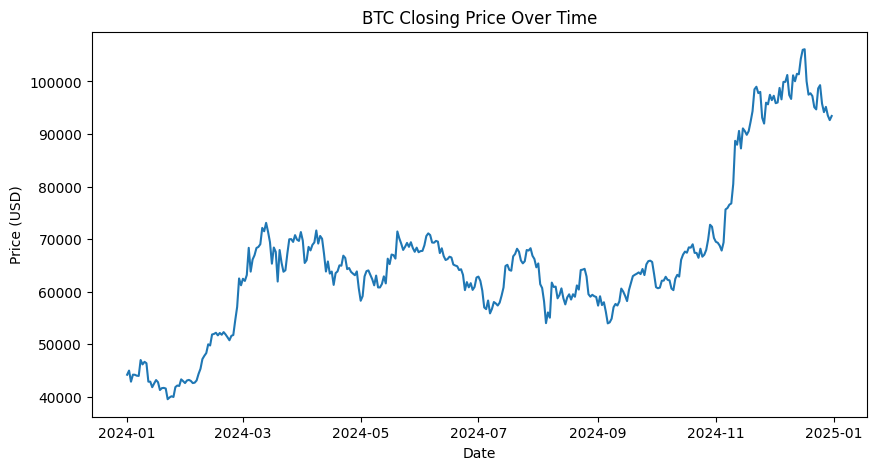

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(btc_df['Date'], btc_df['Close'])
plt.title('BTC Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


2️⃣ Distribution

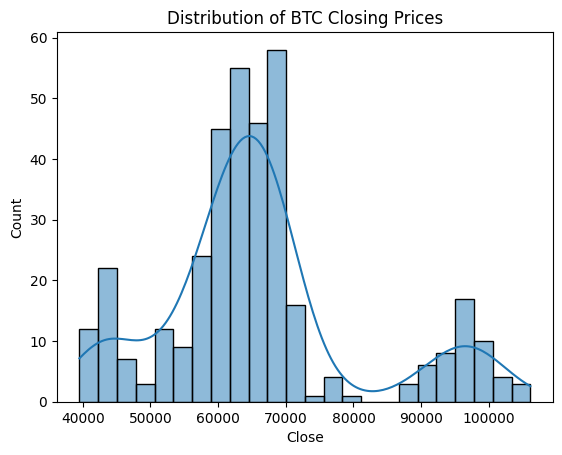

In [ ]:
sns.histplot(btc_df['Close'], kde=True)
plt.title('Distribution of BTC Closing Prices')
plt.show()


3️⃣ Correlation

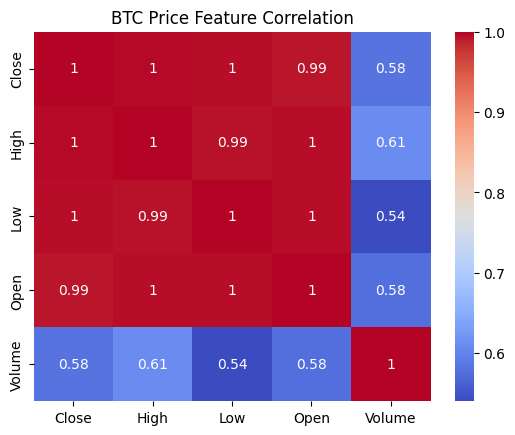

In [ ]:
sns.heatmap(btc_df[['Close','High','Low','Open','Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('BTC Price Feature Correlation')
plt.show()


# 🔵 Ethereum (ETH) Cleaning + EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()  # choose your CSV file

Saving crypto_prices_all.csv to crypto_prices_all (1).csv


load the file

In [ ]:
df = pd.read_csv("crypto_prices_all.csv")

In [ ]:
# Create ETH dataset
eth_df = df[['Date', 'Open.1', 'High.1', 'Low.1', 'Close.1', 'Volume.1']].copy()
eth_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# Convert all numeric columns
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    eth_df[col] = pd.to_numeric(eth_df[col], errors='coerce')

# Drop missing values
eth_df = eth_df.dropna()

# Add a coin identifier
eth_df['Coin'] = 'ETH-USD'

In [ ]:
print("✅ Cleaned ETH data saved as 'cleaned_eth_data.csv'")
print(eth_df.head())

✅ Cleaned ETH data saved as 'cleaned_eth_data.csv'
           Date         Open         High          Low        Close  \
367  2024-01-01  2282.870361  2352.327881  2267.018066  2352.327881   
368  2024-01-02  2352.593506  2431.212402  2348.892334  2355.836426   
369  2024-01-03  2355.981445  2385.117676  2113.925293  2210.761963   
370  2024-01-04  2210.529053  2294.608154  2204.865723  2269.038086   
371  2024-01-05  2269.409424  2276.764648  2209.537109  2268.647217   

           Volume     Coin  
367  6.906766e+09  ETH-USD  
368  1.291054e+10  ETH-USD  
369  1.933293e+10  ETH-USD  
370  1.104456e+10  ETH-USD  
371  1.086095e+10  ETH-USD  


# Save cleaned ETH data

In [ ]:
eth_df.to_csv('cleaned_eth_data.csv', index=False)

basic info

In [ ]:
print(eth_df.describe())

              Open         High          Low        Close        Volume
count   366.000000   366.000000   366.000000   366.000000  3.660000e+02
mean   3042.054376  3115.346380  2965.051783  3044.928617  1.903916e+10
std     511.009209   523.121344   493.880989   509.807259  1.121708e+10
min    2210.529053  2240.380859  2113.925293  2210.761963  4.578472e+09
25%    2562.014221  2630.047485  2496.059387  2566.533020  1.180553e+10
50%    3080.323242  3158.157837  3018.964478  3089.519409  1.599800e+10
75%    3477.986511  3539.811157  3372.058167  3478.342346  2.209779e+10
max    4066.690430  4106.955566  3974.176270  4066.445068  6.766813e+10


Closing Price Trend

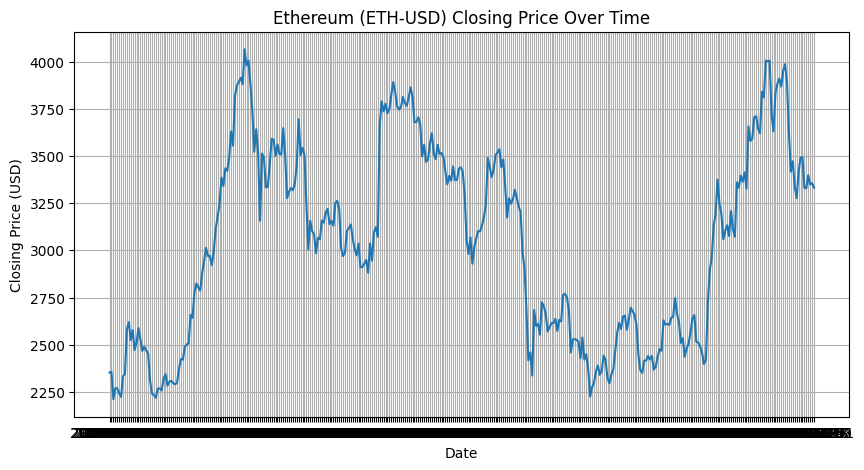

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(eth_df['Date'], eth_df['Close'])
plt.title('Ethereum (ETH-USD) Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

 Price Distribution

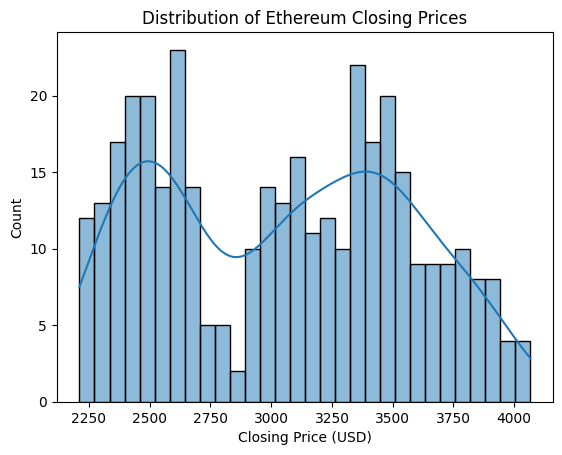

In [ ]:
sns.histplot(eth_df['Close'], kde=True, bins=30)
plt.title('Distribution of Ethereum Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.show()

 Correlation Heatmap

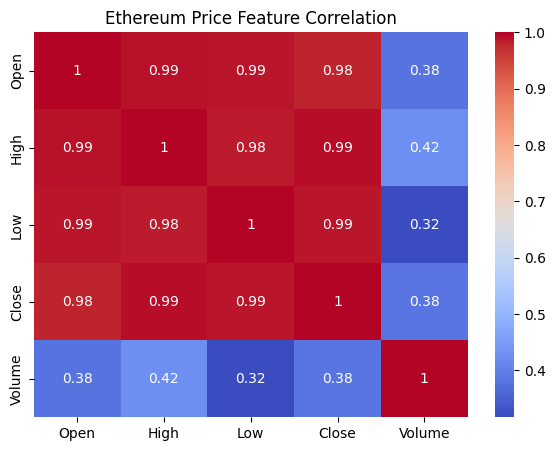

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(eth_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Ethereum Price Feature Correlation')
plt.show()

 Volume vs Price Scatter

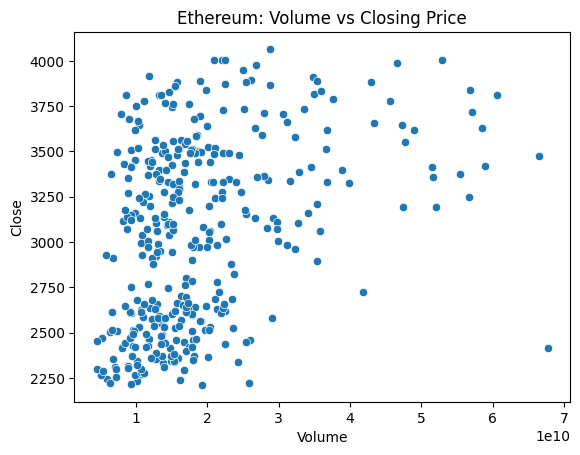

In [ ]:
sns.scatterplot(x='Volume', y='Close', data=eth_df)
plt.title('Ethereum: Volume vs Closing Price')
plt.show()

🟡 Dogecoin (DOGE) Cleaning + EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()  # choose your CSV file

Saving crypto_prices_all.csv to crypto_prices_all (2).csv


In [ ]:
df = pd.read_csv("crypto_prices_all.csv")

In [ ]:
# Create DOGE dataset
doge_df = df[['Date', 'Open.2', 'High.2', 'Low.2', 'Close.2', 'Volume.2']].copy()
doge_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# Convert numeric columns
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    doge_df[col] = pd.to_numeric(doge_df[col], errors='coerce')

# Drop missing values
doge_df = doge_df.dropna()

# Add a coin identifier
doge_df['Coin'] = 'DOGE-USD'

In [ ]:
print("✅ Cleaned DOGE data saved as 'cleaned_doge_data.csv'")
print(doge_df.head())

✅ Cleaned DOGE data saved as 'cleaned_doge_data.csv'
           Date      Open      High       Low     Close        Volume  \
733  2024-01-01  0.089473  0.092046  0.088838  0.092024  2.986870e+08   
734  2024-01-02  0.092037  0.094330  0.090804  0.091204  4.963090e+08   
735  2024-01-03  0.091205  0.092093  0.081018  0.082042  1.026941e+09   
736  2024-01-04  0.082049  0.084655  0.081551  0.084131  5.142302e+08   
737  2024-01-05  0.084121  0.084755  0.081235  0.082773  5.479830e+08   

         Coin  
733  DOGE-USD  
734  DOGE-USD  
735  DOGE-USD  
736  DOGE-USD  
737  DOGE-USD  


# Save cleaned DOGE data

In [ ]:
doge_df.to_csv('cleaned_doge_data.csv', index=False)

# 1️⃣ Basic Info

In [ ]:
print(doge_df.describe())

             Open        High         Low       Close        Volume
count  366.000000  366.000000  366.000000  366.000000  3.660000e+02
mean     0.162341    0.169512    0.155857    0.162964  2.426945e+09
std      0.095136    0.100880    0.090168    0.095417  3.903155e+09
min      0.077929    0.078705    0.074972    0.077933  1.529078e+08
25%      0.103865    0.106760    0.100784    0.104038  5.729620e+08
50%      0.131853    0.137927    0.127600    0.132717  1.023272e+09
75%      0.165251    0.174436    0.159742    0.165603  2.535846e+09
max      0.467299    0.483510    0.448240    0.467297  3.993647e+10


# 2️⃣ Closing Price Trend

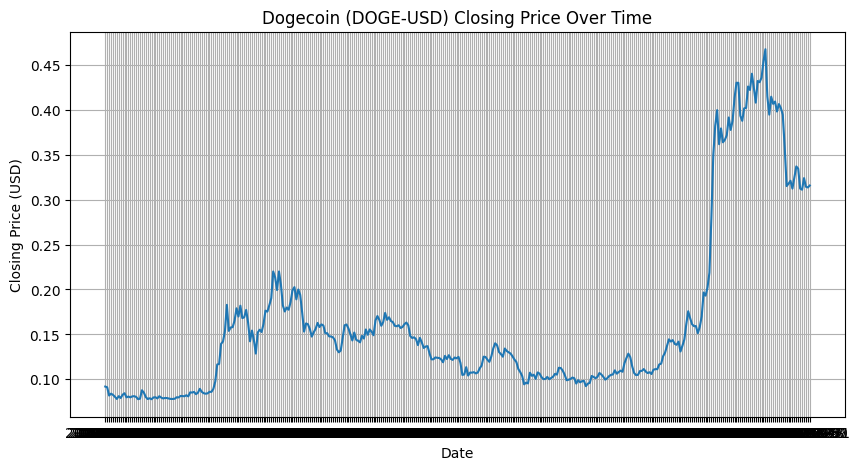

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(doge_df['Date'], doge_df['Close'])
plt.title('Dogecoin (DOGE-USD) Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()


# 3️⃣ Price Distribution

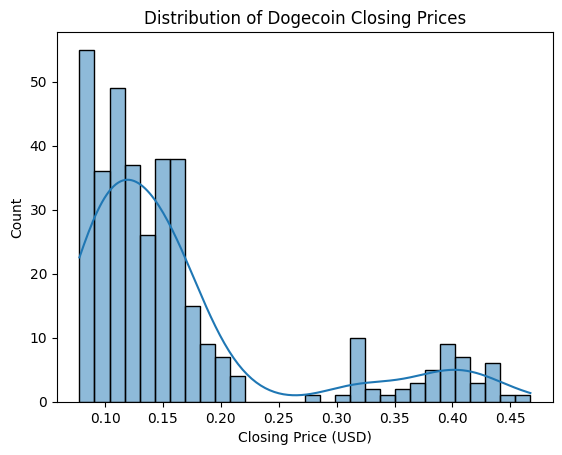

In [ ]:
sns.histplot(doge_df['Close'], kde=True, bins=30)
plt.title('Distribution of Dogecoin Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.show()

 4️⃣ Correlation Heatmap

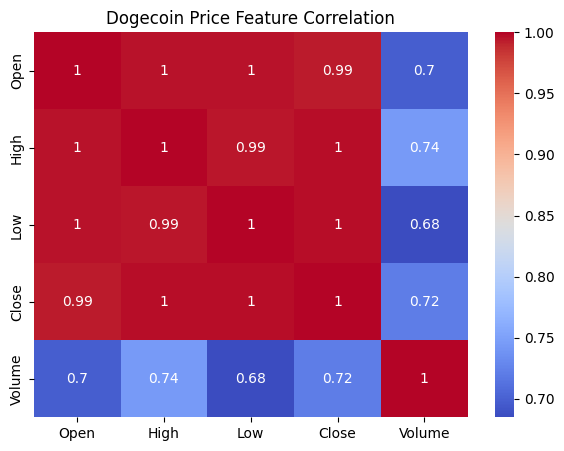

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(doge_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Dogecoin Price Feature Correlation')
plt.show()

 Volume vs Price Scatter

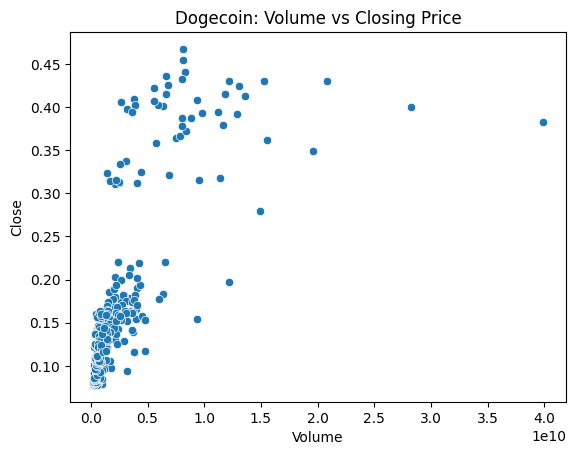

In [ ]:
sns.scatterplot(x='Volume', y='Close', data=doge_df)
plt.title('Dogecoin: Volume vs Closing Price')
plt.show()

In [ ]:
from google.colab import files

In [ ]:
files.download("cleaned_btc_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("cleaned_eth_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("cleaned_doge_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>